## データの前処理

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 各データの読み込み
train = pd.read_table('train.tsv')
test = pd.read_table('test.tsv')
sample = pd.read_csv('sample_submit.csv', header=None) #提出用のデータ

In [3]:
train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,M,0.530,0.435,0.155,0.6990,0.2880,0.1595,0.205,10
1,3,F,0.710,0.565,0.195,1.8170,0.7850,0.4920,0.490,11
2,7,F,0.625,0.520,0.180,1.3540,0.4845,0.3510,0.375,11
3,12,M,0.375,0.280,0.095,0.2225,0.0875,0.0430,0.080,10
4,16,I,0.415,0.330,0.090,0.3595,0.1700,0.0810,0.090,6


In [4]:
test.head()

,id,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1,F,0.710,0.570,0.195,1.9805,0.9925,0.4925,0.4800
1,2,F,0.485,0.395,0.160,0.6600,0.2475,0.1280,0.2350
2,4,M,0.700,0.580,0.205,2.1300,0.7415,0.4900,0.5800
3,5,F,0.670,0.525,0.190,1.5270,0.5755,0.3530,0.4400
4,6,I,0.435,0.300,0.120,0.5965,0.2590,0.1390,0.1645


In [5]:
sample.head()

,0,1
0,1,9
1,2,17
2,4,17
3,5,17
4,6,14


In [6]:
train.shape

(2088, 10)

In [7]:
test.shape

(2089, 9)

In [8]:
# train,testのカラム'id'の削除
train = train.drop(columns='id')
test = test.drop(columns='id')

In [9]:
train.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000
mean,0.521873,0.406557,0.139413,0.819116,0.355410,0.178227,0.237196,9.930077
std,0.121148,0.100285,0.044880,0.484888,0.218666,0.108274,0.139393,3.283578
min,0.110000,0.090000,0.000000,0.008000,0.002500,0.002000,0.003000,2.000000
25%,0.450000,0.350000,0.115000,0.438875,0.184375,0.092000,0.130000,8.000000
50%,0.540000,0.420000,0.140000,0.791250,0.334000,0.168750,0.230250,9.000000
75%,0.610000,0.480000,0.165000,1.140125,0.497500,0.247500,0.325000,11.000000
max,0.780000,0.625000,1.130000,2.555000,1.245500,0.574500,1.005000,29.000000


In [10]:
test.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000
mean,0.526111,0.409205,0.139619,0.838363,0.363323,0.182960,0.240465
std,0.119020,0.098190,0.038545,0.495756,0.225193,0.110913,0.139026
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.444500,0.188000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.806000,0.340000,0.171500,0.235000
75%,0.615000,0.480000,0.165000,1.168500,0.507000,0.257000,0.330000
max,0.815000,0.650000,0.250000,2.825500,1.488000,0.760000,0.897000


- 'Height'のminが0であることが気になる

In [11]:
# 欠損値、データの型の確認
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088 entries, 0 to 2087
Data columns (total 9 columns):
Sex               2088 non-null object
Length            2088 non-null float64
Diameter          2088 non-null float64
Height            2088 non-null float64
Whole weight      2088 non-null float64
Shucked weight    2088 non-null float64
Viscera weight    2088 non-null float64
Shell weight      2088 non-null float64
Rings             2088 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 146.9+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 8 columns):
Sex               2089 non-null object
Length            2089 non-null float64
Diameter          2089 non-null float64
Height            2089 non-null float64
Whole weight      2089 non-null float64
Shucked weight    2089 non-null float64
Viscera weight    2089 non-null float64
Shell weight      2089 non-null float64
dtypes: float64(7), object(1)
memory usage: 130.7+ KB


- train,testともに欠損値はなさそう
- 'Sex'だけがカテゴリ変数

In [13]:
# 'Sex'の確認
# I: Intersex インターセックス。半陰陽。性分化疾患。
train['Sex'].value_counts()

M    762
I    676
F    650
Name: Sex, dtype: int64

In [14]:
test['Sex'].value_counts()

M    766
I    666
F    657
Name: Sex, dtype: int64

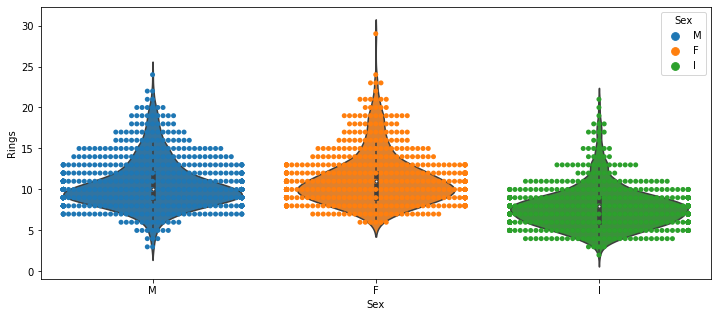

In [15]:
# 'Sex'の目的変数'Rings'についての分布
plt.figure(figsize = (12,5))
sns.swarmplot(x='Sex', y='Rings', data=train, hue='Sex')
sns.violinplot(x='Sex', y='Rings', data=train)
plt.show()

In [16]:
train.groupby('Sex').mean().sort_values('Rings')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,,,,,,,,
I,0.421612,0.322404,0.106494,0.411634,0.183072,0.087459,0.122796,7.828402
M,0.560236,0.438445,0.151332,0.982270,0.429161,0.213228,0.279509,10.640420
F,0.581169,0.456692,0.159677,1.051632,0.448182,0.231593,0.306568,11.283077


- 'Sex'=='I'は'Rings'の値が低くなる傾向にある？

In [17]:
# カテゴリ変数'Sex'の変換
train = pd.get_dummies(train, columns=['Sex'])
test = pd.get_dummies(test, columns=['Sex'])

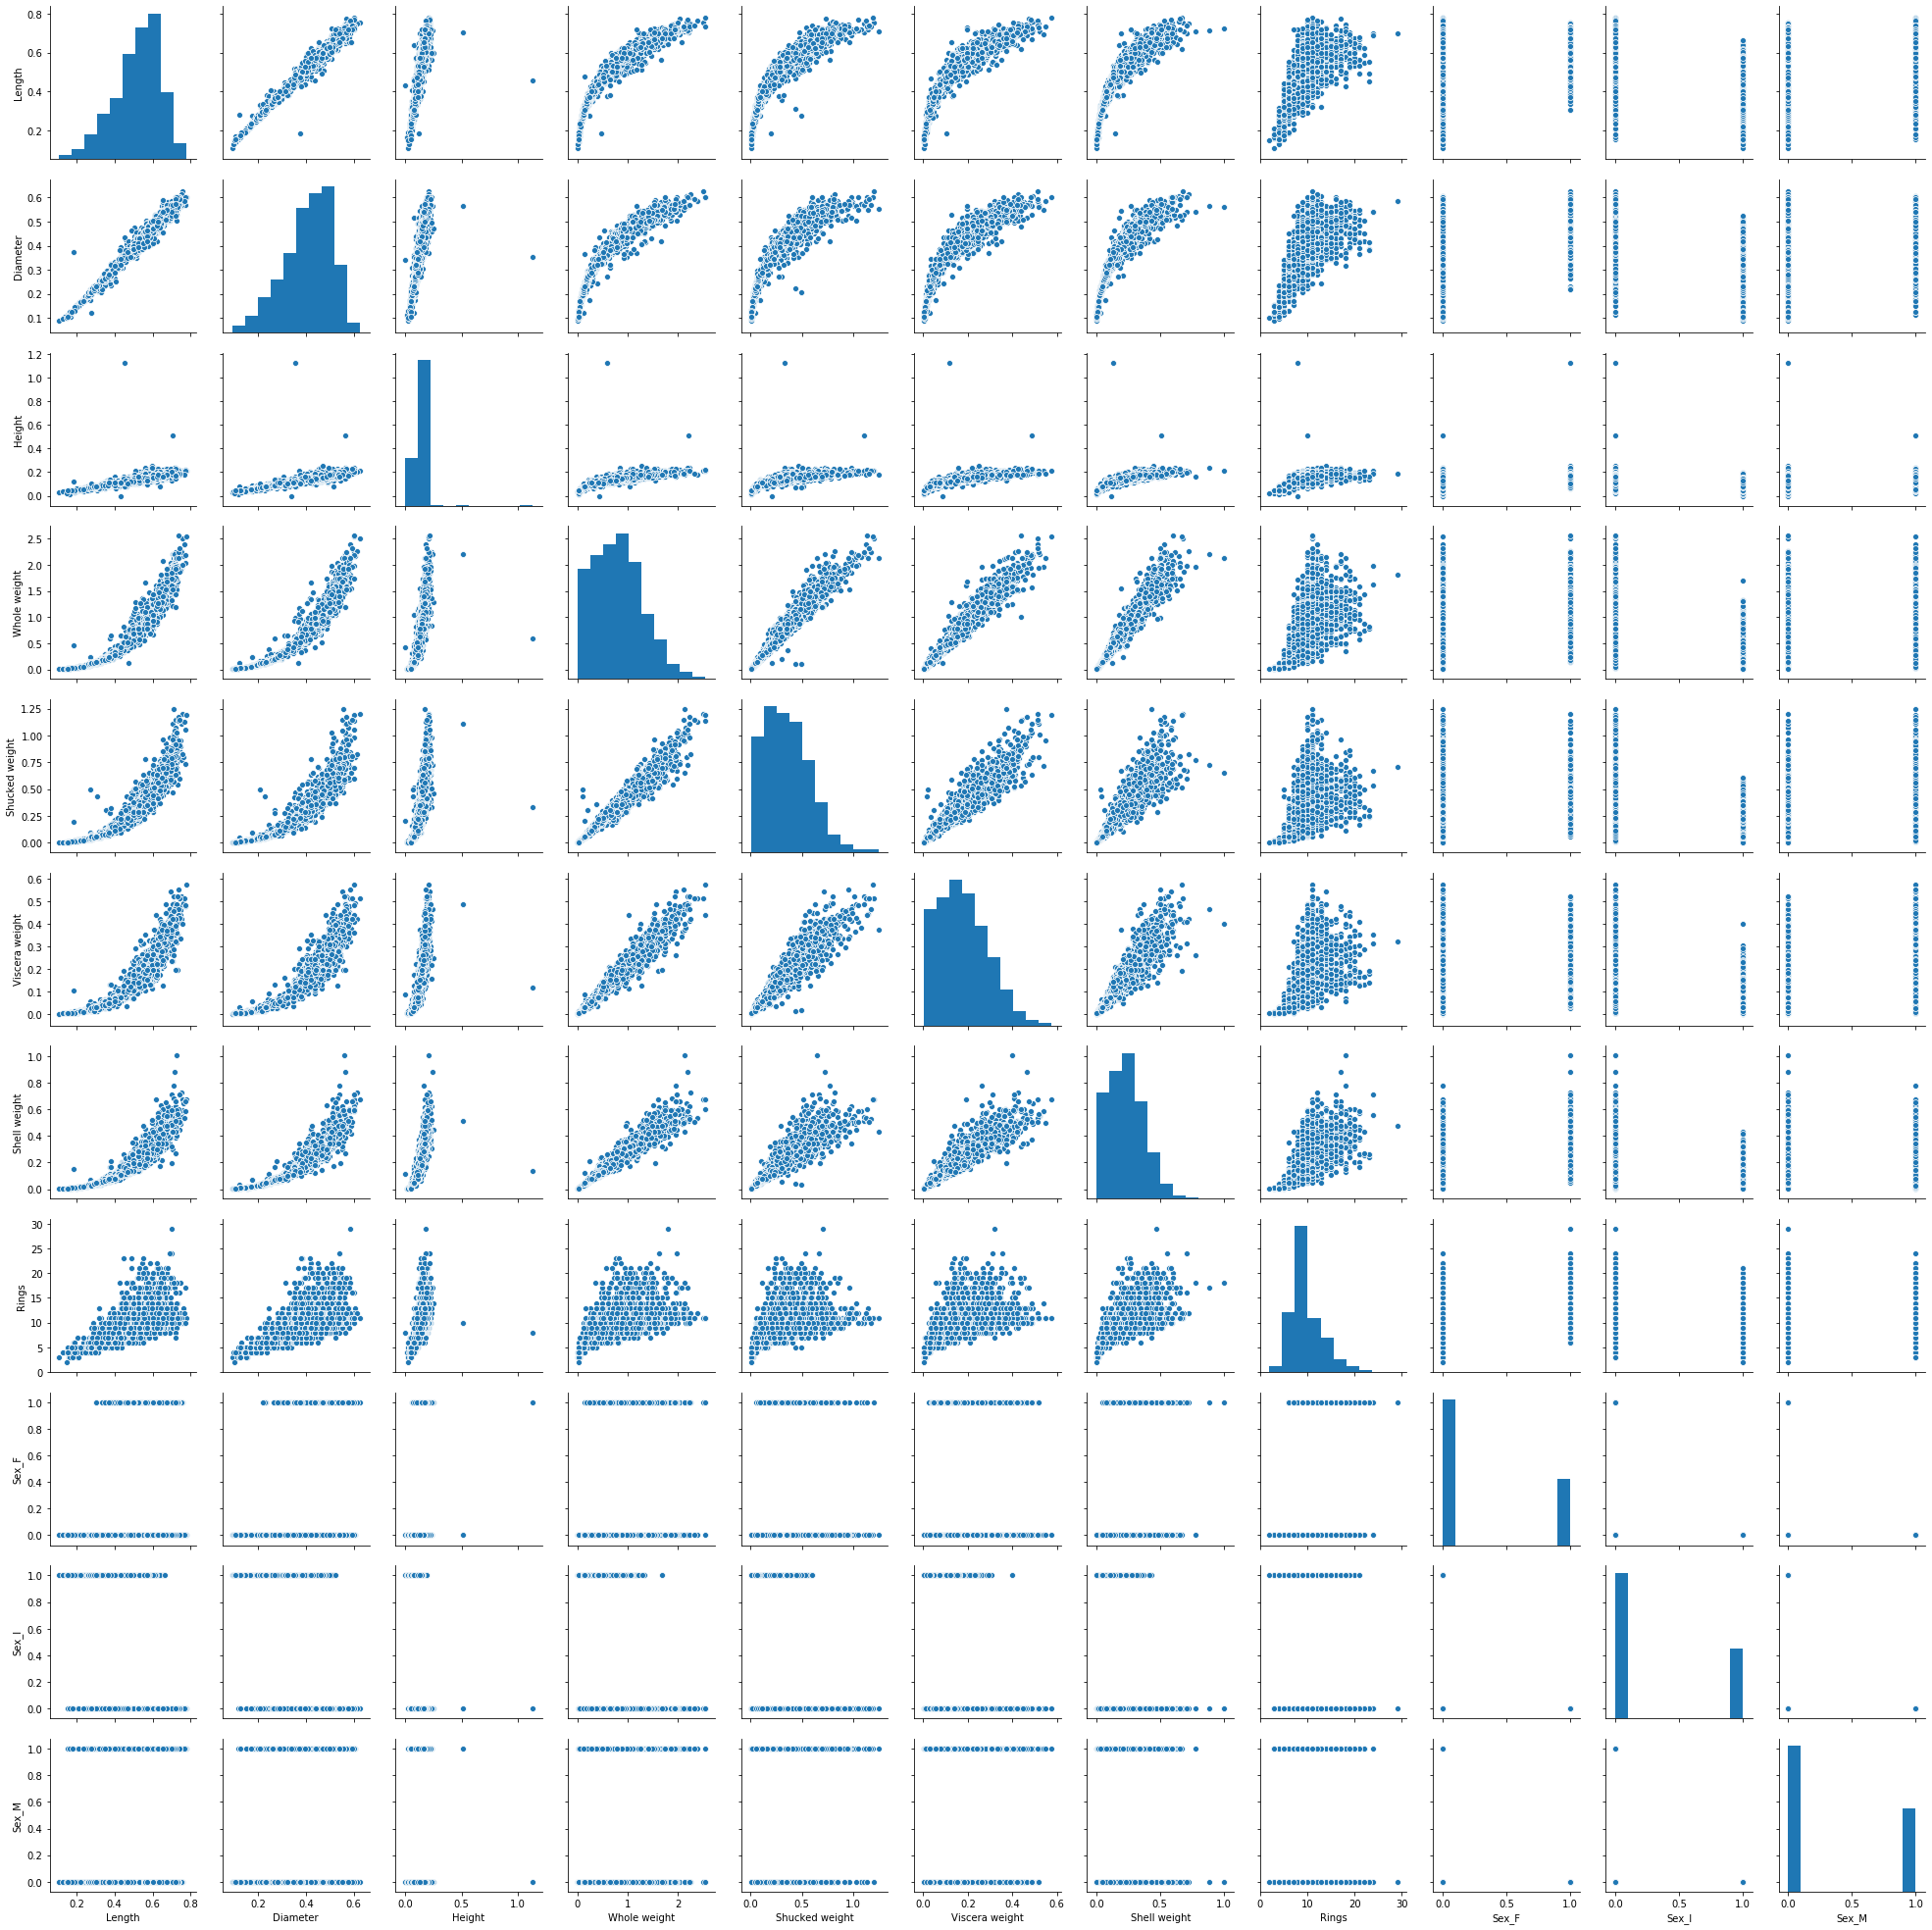

In [18]:
sns.pairplot(train)
plt.show()

- 'Height'のヒストグラムがおかしい
- 'Rings'（目的変数）のヒストグラムが対数分布ぽい？

(array([ 39., 387., 951., 350., 224.,  84.,  35.,  15.,   2.,   1.]),
 array([ 2. ,  4.7,  7.4, 10.1, 12.8, 15.5, 18.2, 20.9, 23.6, 26.3, 29. ]),
 <a list of 10 Patch objects>)

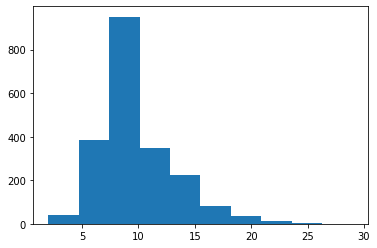

In [19]:
# 'Rings'の単変量分析
plt.hist(train['Rings'])

- 見た感じ対数分布しているので、対数変換して正規分布に近づける

In [20]:
# 対数変換
train['Rings_log1p'] = np.log1p(train['Rings'])
train = train.drop(columns='Rings')

(array([  1.,   6.,  32., 200., 472., 666., 518., 118.,  69.,   6.]),
 array([1.09861229, 1.3288708 , 1.55912931, 1.78938782, 2.01964633,
        2.24990484, 2.48016334, 2.71042185, 2.94068036, 3.17093887,
        3.40119738]),
 <a list of 10 Patch objects>)

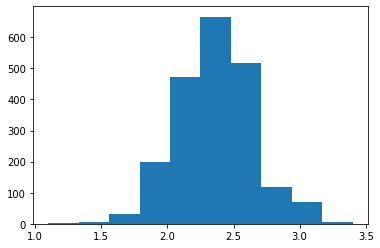

In [21]:
plt.hist(train['Rings_log1p'])

(array([5.140e+02, 1.564e+03, 8.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.   , 0.113, 0.226, 0.339, 0.452, 0.565, 0.678, 0.791, 0.904,
        1.017, 1.13 ]),
 <a list of 10 Patch objects>)

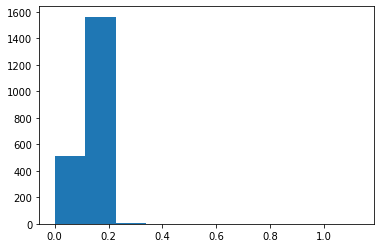

In [22]:
# 'Height'の単変量分析
plt.hist(train['Height'])

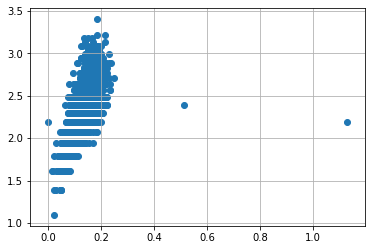

In [23]:
# 'Height'と'Rings_log1p'の２変量分析
plt.scatter(x=train['Height'], y=train['Rings_log1p'])
plt.grid()
plt.show()

In [24]:
# 外れ値の削除
train = train.drop(train[train['Height'] > 0.4].index)

(array([  3.,  23., 117., 178., 341., 621., 487., 206.,  97.,  13.]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 ]),
 <a list of 10 Patch objects>)

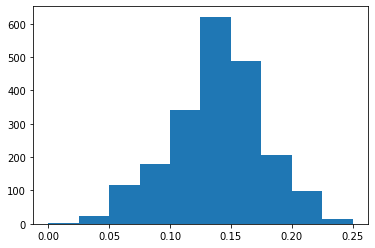

In [25]:
plt.hist(train['Height'])

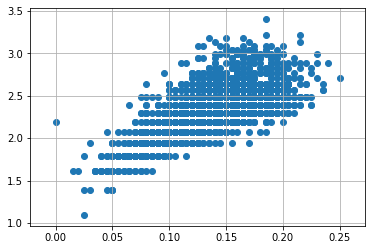

In [26]:
plt.scatter(x=train['Height'], y=train['Rings_log1p'])
plt.grid()
plt.show()

In [29]:
from scipy.stats import skew

# 各特徴量の歪度を調べる
skew_list = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
             'Viscera weight', 'Shell weight', 'Rings_log1p']
skew_values = skew(train[skew_list], nan_policy='raise')
skewness = pd.concat([pd.DataFrame(skew_list, columns=['Train cols']),
                      pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis=1)
skewness.sort_values(by='Skewness degree', ascending=False)

,Train cols,Skewness degree
4,Shucked weight,0.640627
6,Shell weight,0.607224
5,Viscera weight,0.534808
3,Whole weight,0.477240
7,Rings_log1p,-0.028985
2,Height,-0.297987
1,Diameter,-0.625636
0,Length,-0.646765


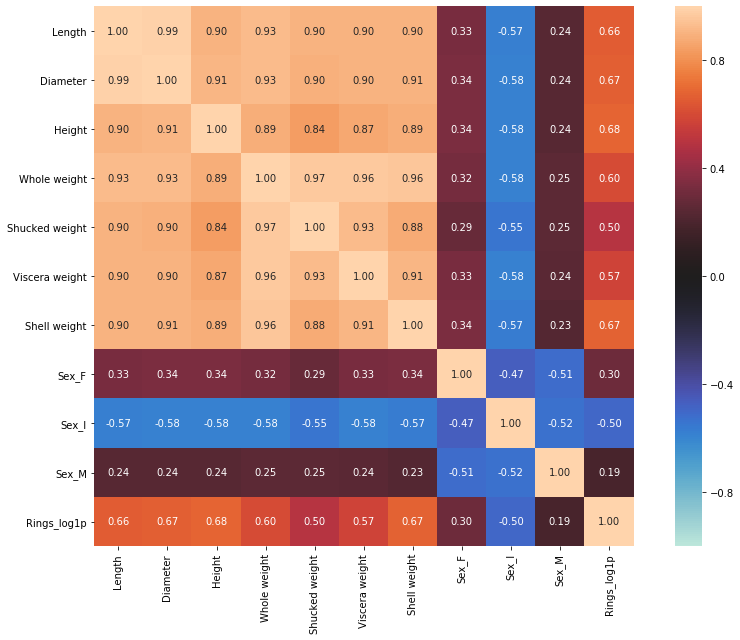

In [30]:
# 相関行列
train_corr = train.corr()

plt.figure(figsize=(12, 9), facecolor='white', tight_layout=True)
sns.heatmap(train_corr, square=True, vmax=1, vmin=-1, center=0, annot=True, fmt=".2f")
plt.show()

- 'Length'から'Shell weight'の説明変数の相関が高い
- 特に、'Length'と'Diameter'の相関が高い(0.99)

In [31]:
# 新しい特徴量の作成
#面積
train['Area'] = train['Length'] * train['Diameter']
test['Area'] = test['Length'] * test['Diameter']

#１面積当たりの全体重量
train['Whole weight per Area'] = train['Whole weight'] / train['Area']
test['Whole weight per Area'] = test['Whole weight'] / test['Area']

#１面積当たりの身の重量
train['Shucked weight per Area'] = train['Shucked weight'] / train['Area']
test['Shucked weight per Area'] = test['Shucked weight'] / test['Area']

#１面積当たりの内臓の重量
train['Viscera weight per Area'] = train['Viscera weight'] / train['Area']
test['Viscera weight per Area'] = test['Viscera weight'] / test['Area']

#１面積当たりの殻の重量
train['Shell weight per Area'] = train['Shell weight'] / train['Area']
test['Shell weight per Area'] = test['Shell weight'] / test['Area']

In [32]:
train.shape

(2086, 16)

In [33]:
test.shape

(2089, 15)

In [34]:
# 説明変数と目的変数に分割
trainX = train.drop(columns='Rings_log1p')
trainY = train['Rings_log1p']

testX = test.copy()

In [35]:
from sklearn.model_selection import train_test_split

# trainをtrainとvalに分ける(8:2)
train_X, val_X, train_y, val_y = train_test_split(trainX, trainY, test_size=0.2, random_state=111)

# モデルの構築

In [41]:
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor #モデル
import optuna #パラメータの最適化

In [42]:
# 評価関数の定義
def RMSE(y, y_pred):
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    return rmse

In [43]:
# optunaによるモデルのパラメータの最適化
def objective_XGBR(trial):
    parameters = {
        'learning_rate': trial.suggest_discrete_uniform('learning_rate', 0.01, 0.3, 0.01),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'random_state': 111,
        'objective': 'reg:squarederror'
    }
    model_XGBR = XGBRegressor(**parameters)
    model_XGBR.fit(train_X, train_y)
    val_y_pred = model_XGBR.predict(val_X)
    return RMSE(val_y, val_y_pred)

In [44]:
study = optuna.create_study()
study.optimize(objective_XGBR, n_trials=300)

[I 2019-12-22 19:48:07,717] Finished trial#0 resulted in value: 0.1823653112699623. Current best value is 0.1823653112699623 with parameters: {'learning_rate': 0.05, 'max_depth': 9}.
[I 2019-12-22 19:48:07,946] Finished trial#1 resulted in value: 0.18291761484529181. Current best value is 0.1823653112699623 with parameters: {'learning_rate': 0.05, 'max_depth': 9}.
[I 2019-12-22 19:48:08,600] Finished trial#2 resulted in value: 0.18703466026782029. Current best value is 0.1823653112699623 with parameters: {'learning_rate': 0.05, 'max_depth': 9}.
[I 2019-12-22 19:48:08,951] Finished trial#3 resulted in value: 0.17506799776371984. Current best value is 0.17506799776371984 with parameters: {'learning_rate': 0.15000000000000002, 'max_depth': 4}.
[I 2019-12-22 19:48:09,195] Finished trial#4 resulted in value: 0.1753945148999061. Current best value is 0.17506799776371984 with parameters: {'learning_rate': 0.15000000000000002, 'max_depth': 4}.
[I 2019-12-22 19:48:09,607] Finished trial#5 resul

[I 2019-12-22 19:48:23,486] Finished trial#43 resulted in value: 0.17203810857744636. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:48:23,978] Finished trial#44 resulted in value: 0.17629983524562703. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:48:24,406] Finished trial#45 resulted in value: 0.17381386041626817. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:48:24,888] Finished trial#46 resulted in value: 0.1763740062413217. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:48:25,313] Finished trial#47 resulted in value: 0.1755623753658515. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:48:25,627] Finished trial#48 resulted in value: 0.18151

[I 2019-12-22 19:48:40,523] Finished trial#87 resulted in value: 0.17483583699431135. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:48:40,899] Finished trial#88 resulted in value: 0.17203810857744636. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:48:41,325] Finished trial#89 resulted in value: 0.17674914503875533. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:48:41,727] Finished trial#90 resulted in value: 0.17203810857744636. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:48:42,100] Finished trial#91 resulted in value: 0.17203810857744636. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:48:42,467] Finished trial#92 resulted in value: 0.172

[I 2019-12-22 19:48:57,737] Finished trial#130 resulted in value: 0.17289124392595734. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:48:58,237] Finished trial#131 resulted in value: 0.17289124392595734. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:48:58,634] Finished trial#132 resulted in value: 0.1733661220165117. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:48:59,181] Finished trial#133 resulted in value: 0.17674914503875533. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:48:59,594] Finished trial#134 resulted in value: 0.17289124392595734. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:49:00,039] Finished trial#135 resulted in value: 

[I 2019-12-22 19:49:16,038] Finished trial#173 resulted in value: 0.17189839076825542. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:49:16,438] Finished trial#174 resulted in value: 0.17189839076825542. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:49:16,832] Finished trial#175 resulted in value: 0.17189839076825542. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:49:17,228] Finished trial#176 resulted in value: 0.1733661220165117. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:49:17,626] Finished trial#177 resulted in value: 0.1733661220165117. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:49:18,020] Finished trial#178 resulted in value: 0

[I 2019-12-22 19:49:34,194] Finished trial#216 resulted in value: 0.17189839076825542. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:49:34,597] Finished trial#217 resulted in value: 0.17189839076825542. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:49:35,013] Finished trial#218 resulted in value: 0.17189839076825542. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:49:35,429] Finished trial#219 resulted in value: 0.17189839076825542. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:49:35,833] Finished trial#220 resulted in value: 0.17189839076825542. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:49:36,231] Finished trial#221 resulted in value:

[I 2019-12-22 19:49:52,079] Finished trial#259 resulted in value: 0.17189839076825542. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:49:52,490] Finished trial#260 resulted in value: 0.17189839076825542. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:49:52,903] Finished trial#261 resulted in value: 0.17189839076825542. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:49:53,314] Finished trial#262 resulted in value: 0.17189839076825542. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:49:53,723] Finished trial#263 resulted in value: 0.17189839076825542. Current best value is 0.17189839076825542 with parameters: {'learning_rate': 0.09, 'max_depth': 4}.
[I 2019-12-22 19:49:54,079] Finished trial#264 resulted in value:

In [45]:
study.best_params

{'learning_rate': 0.09, 'max_depth': 4}

In [46]:
study.best_value

0.17189839076825542

In [47]:
params = {
    'learning_rate': 0.09,
    'max_depth': 4,
    'random_state': 111,
    'objective': 'reg:squarederror'
}

In [48]:
model = XGBRegressor(**params)
model.fit(train_X, train_y)
val_y_pred = model.predict(val_X)

In [49]:
RMSE(val_y, val_y_pred)

0.17189839076825542

In [50]:
# 各特徴量の重要度の確認
feature_importance = model.feature_importances_
feature_name = train_X.columns
feature = pd.Series(feature_importance, index=feature_name)

In [51]:
feature.sort_values(ascending=False)

Shell weight per Area      0.314813
Shell weight               0.304836
Viscera weight             0.069519
Whole weight per Area      0.045809
Diameter                   0.038036
Whole weight               0.036323
Sex_I                      0.034569
Area                       0.030633
Shucked weight per Area    0.028056
Shucked weight             0.021959
Height                     0.018909
Viscera weight per Area    0.017576
Sex_F                      0.016414
Sex_M                      0.012820
Length                     0.009729
dtype: float32

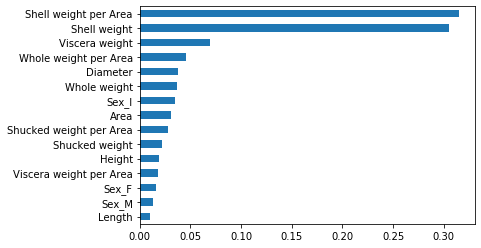

In [52]:
feature.sort_values().plot(kind="barh")
plt.show()

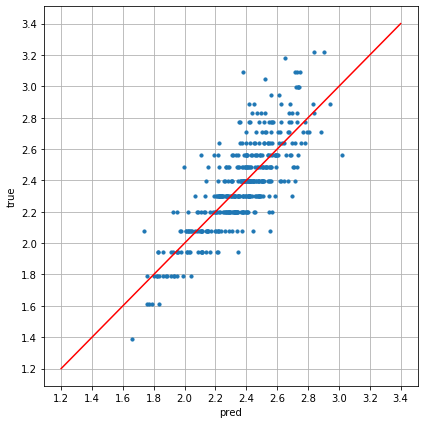

In [53]:
plt.rcParams['axes.axisbelow'] = True

# 横軸に目的変数の予測値、縦軸に実際の値をプロット
plt.figure(figsize=(6,6), facecolor='w', tight_layout=True)
plt.scatter(val_y_pred, val_y, s=10)
plt.plot([1.2,3.4], [1.2,3.4], c='r')
plt.xticks([i / 10 for i in range(12, 36, 2)])
plt.yticks([i / 10 for i in range(12, 36, 2)])
plt.xlabel('pred')
plt.ylabel('true')
plt.grid()
plt.show()

In [54]:
testY_pred = model.predict(testX)
# 目的変数を逆対数変換し、整数にする
testY_pred = np.expm1(testY_pred).round().astype('int')

In [55]:
testY_pred

array([12, 13, 13, ..., 13, 14, 12])

In [42]:
sample[1] = testY_pred
sample.to_csv('submit-20191218.csv', index=None, header=None)